In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering,DBSCAN,Birch
from scipy.cluster.hierarchy import dendrogram , linkage
from collections import defaultdict

import matplotlib.pyplot as plt

In [8]:
da = pd.read_csv("zoo.csv")
data = da.drop( ["animal_name"]+["class_type"], axis=1)
col = data["legs"]
maxx = col.max()
data['legs'] = data['legs'].apply(lambda x: x / maxx)


In [9]:
pca = PCA(2)
 
df = pca.fit_transform(data)
 


In [10]:
kmeans = KMeans(n_clusters= 7)
 
label = kmeans.fit_predict(df)


In [11]:
D = defaultdict(lambda:0)
for item in label:
    D[item] += 1

In [12]:
for k,v in D.items():
    print (k,v)

0 35
3 14
2 13
6 7
5 18
4 5
1 9


In [13]:
agg_clustering = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
labels = agg_clustering.fit_predict(df)


In [14]:
D_agg = defaultdict(lambda:0)
for item in labels:
    D_agg[item] += 1

In [15]:
for j,l in D_agg.items():
    print (j,l)

0 35
3 14
6 12
2 10
1 16
4 6
5 8


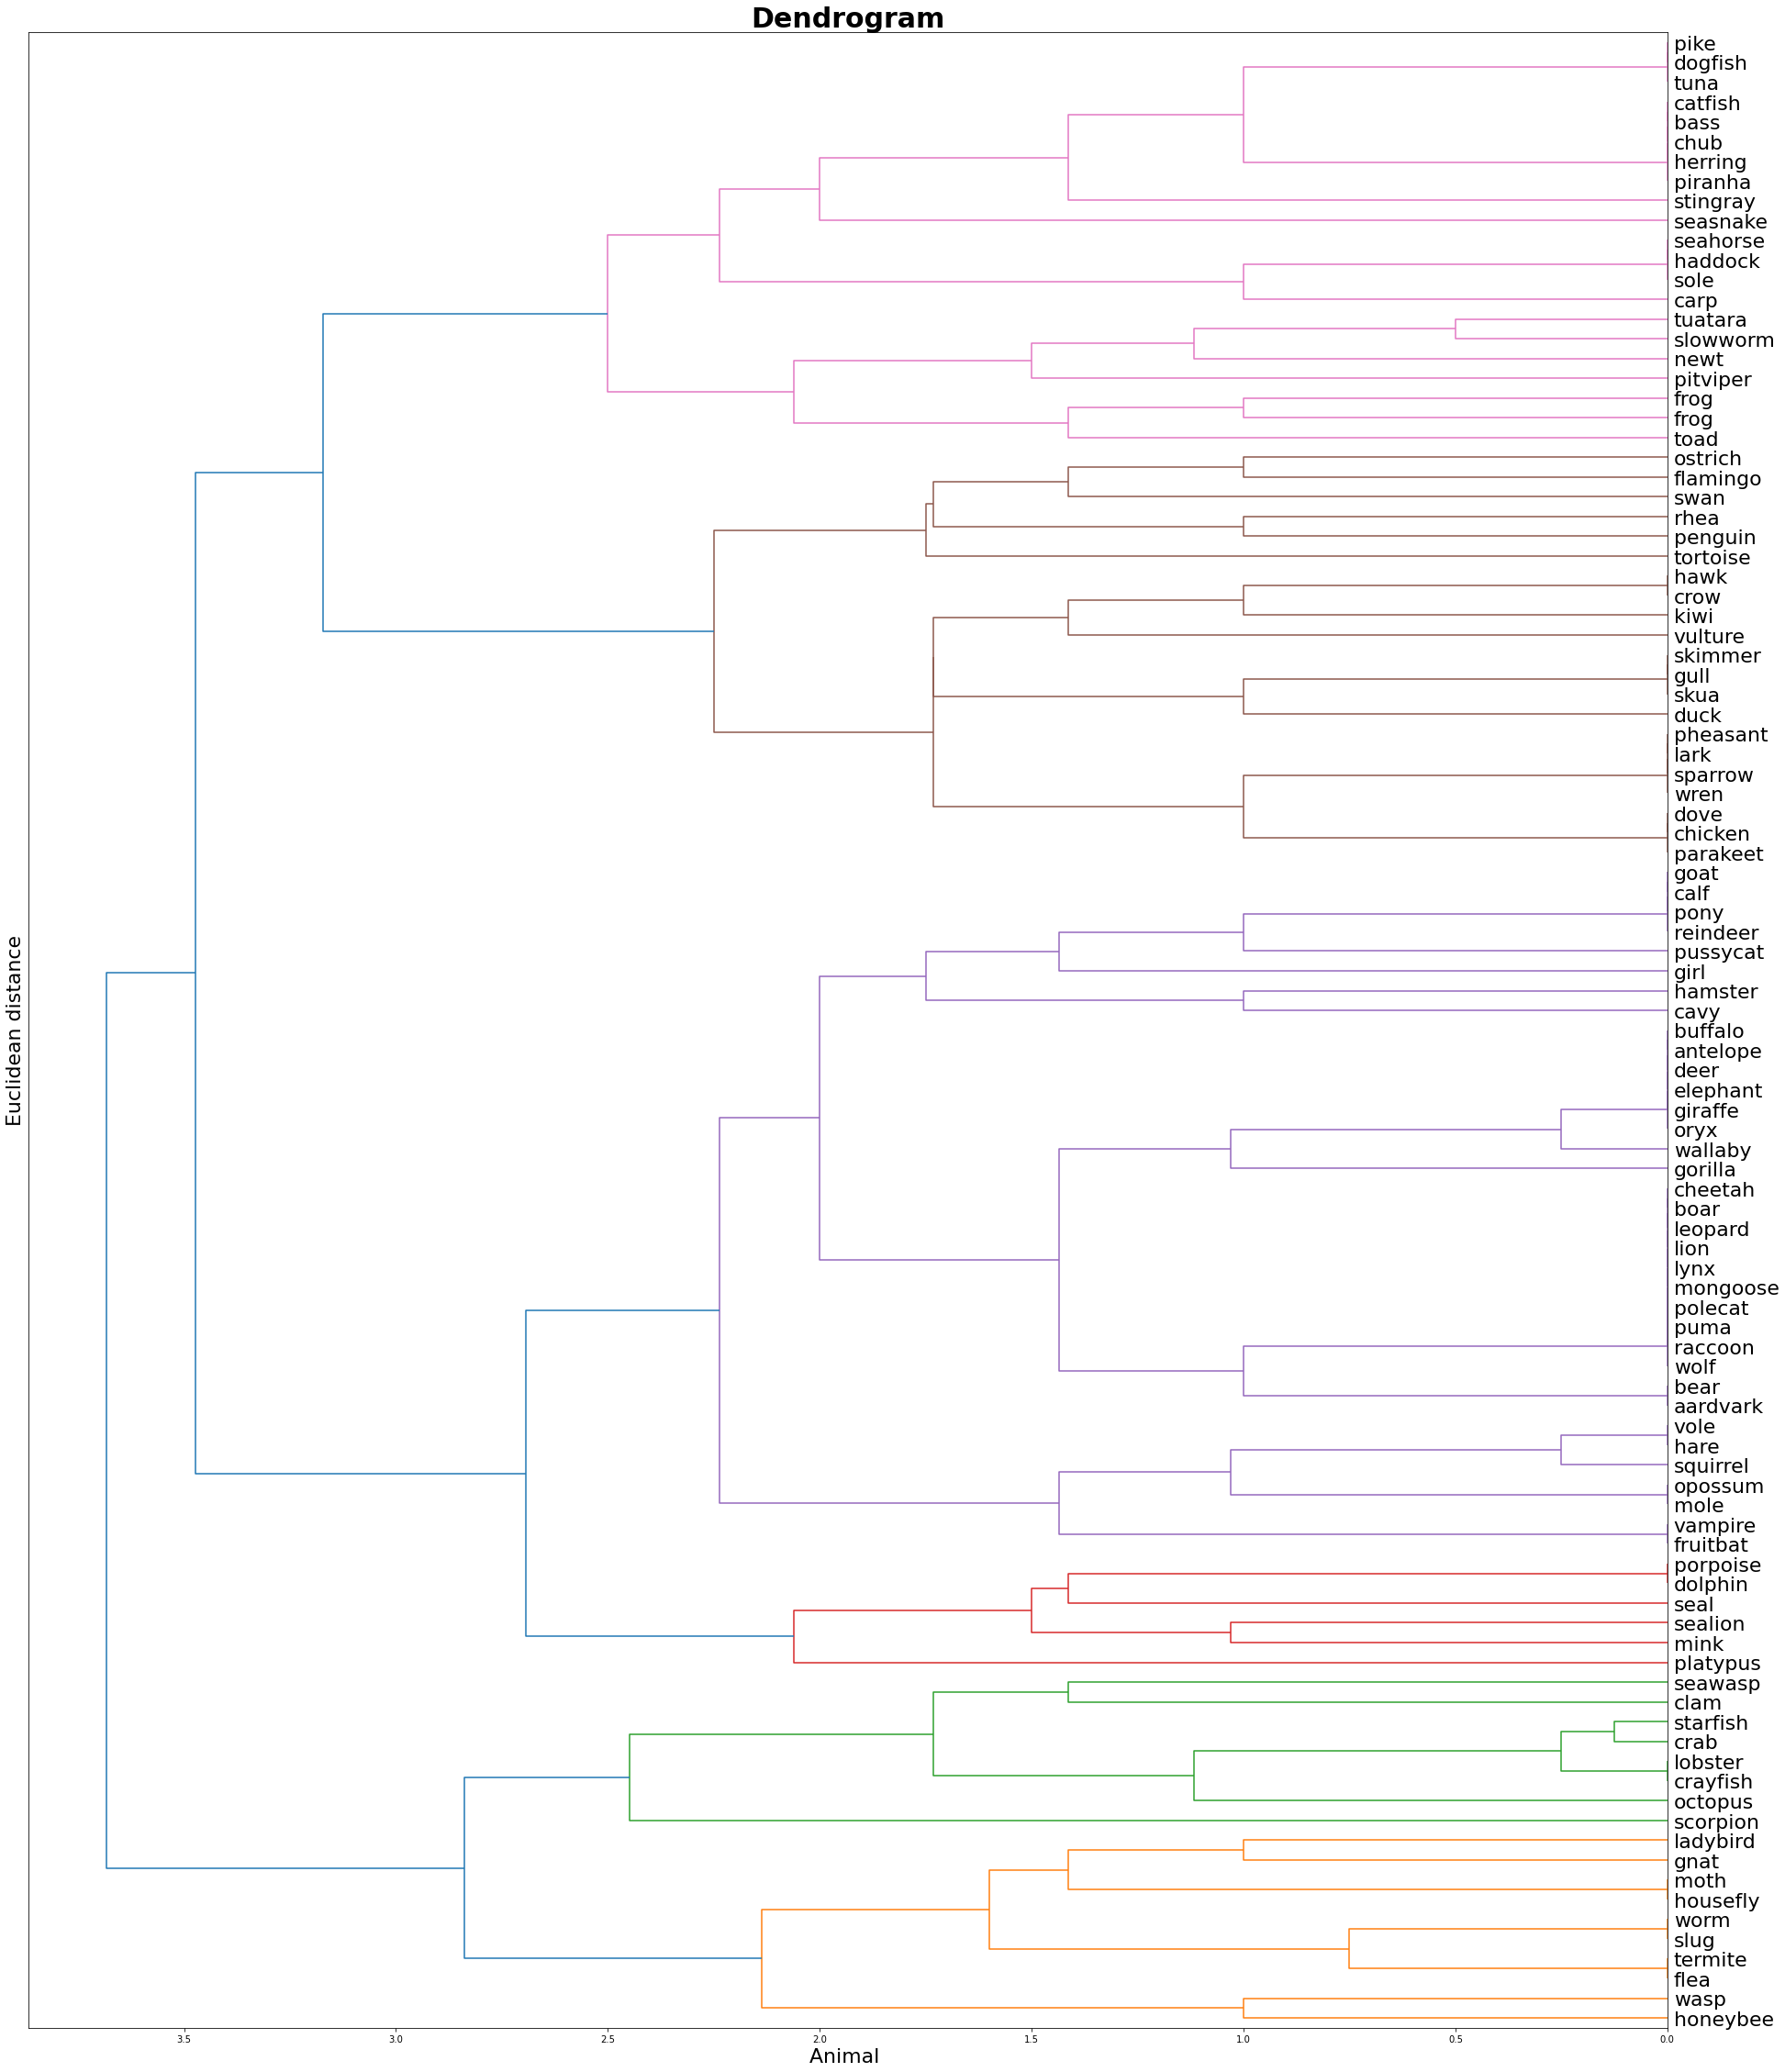

In [16]:
##qui costruistisco un dendogramma per un clusterign gerarchico
Z = linkage(data, method = 'complete')
 
plt.figure(figsize = (32,40))
dendro = dendrogram(Z, orientation = "left",
                   labels=[x for x in da["animal_name"]],
                   leaf_font_size=22)
plt.title("Dendrogram", fontsize = 30, fontweight="bold")
plt.ylabel('Euclidean distance', fontsize = 22)
plt.xlabel("Animal ", fontsize = 22)
plt.show()

In [17]:
## Algoritmo Spectral Clustering

clustering = SpectralClustering(n_clusters=7, assign_labels="discretize", random_state=0).fit_predict(df)

D_spec = defaultdict(lambda:0)
for item in clustering:
    D_spec[item] += 1
    
for a,b in D_spec.items():
    print (a,b)

0 35
2 9
3 13
1 15
4 16
5 5
6 8


In [18]:
u_clustering = np.unique(clustering)


In [19]:
## Algoritmo DBSCAN basato sulla densità 

dbscan =DBSCAN(eps=0.3,min_samples=4).fit_predict(df)

D_dbscan = defaultdict(lambda:0)
for item in dbscan:
    D_dbscan[item] += 1
    
for c,d in D_dbscan.items():
    print (c,d)

0 35
1 9
2 4
3 28
-1 15
4 5
5 5


In [20]:
u_dbscan = np.unique(dbscan)


In [21]:
### Algoritmo Birch

brc = Birch(n_clusters=7, threshold = 0.1)
u = brc.fit_predict(df)

u_birch= np.unique(u)


In [22]:
D_brc = defaultdict(lambda:0)
for item in u:
    D_brc[item] += 1
    

for ee,ff in D_brc.items():
    print (ee,ff)

4 35
3 14
5 13
2 10
1 15
0 6
6 8


In [23]:
## funzione per trovare la posizione di ogni membro del cluster nel dataset originale 

def select_points(data, label, cluster):
    pos = [i for i, x in enumerate(label) if x == cluster]
    return da.iloc[pos]

In [24]:
select_points(da,label,2)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
43,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
57,parakeet,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
59,pheasant,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


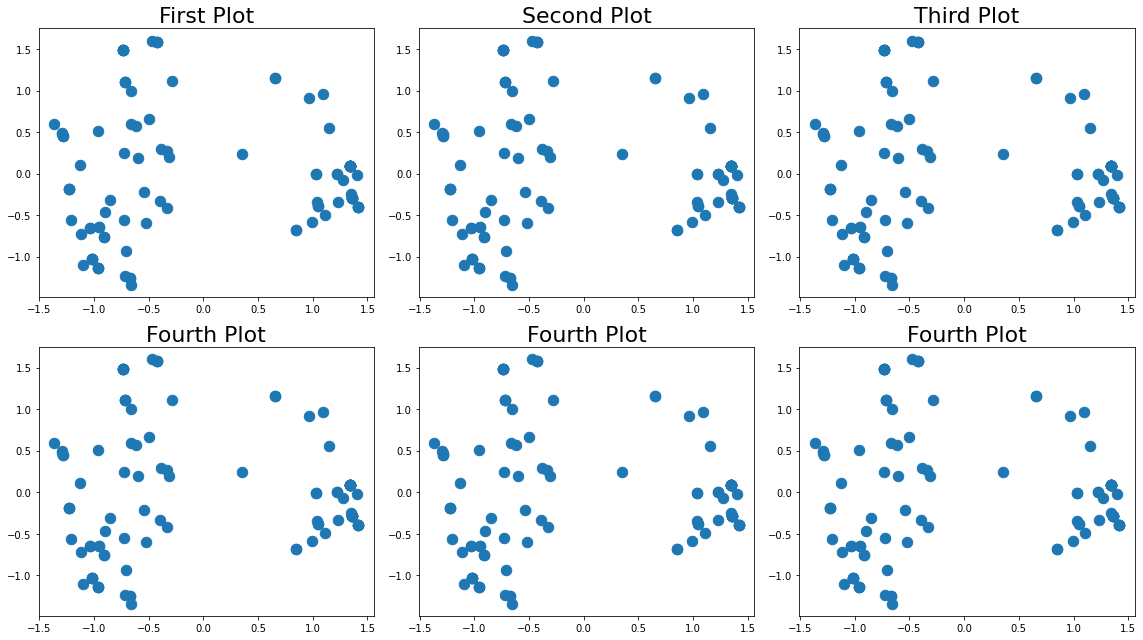

In [25]:
fig, ax = plt.subplots(figsize=(16,9),ncols=3, nrows=2)
ax[0][0].scatter(df[:,0],df[:,1], s=110)###classificazione reale
ax[0][1].scatter(df[:,0],df[:,1], s=110)###classificazione kmeans
ax[0][2].scatter(df[:,0],df[:,1], s=110)
ax[1][0].scatter(df[:,0],df[:,1], s=110)
ax[1][1].scatter(df[:,0],df[:,1], s=110)
ax[1][2].scatter(df[:,0],df[:,1], s=110)

ax[0][0].set_title('First Plot', fontsize = 22)
ax[0][1].set_title('Second Plot', fontsize = 22)
ax[0][2].set_title('Third Plot', fontsize = 22)
ax[1][0].set_title('Fourth Plot', fontsize = 22)
ax[1][1].set_title('Fourth Plot', fontsize = 22)
ax[1][2].set_title('Fourth Plot',fontsize = 22)
plt.tight_layout()

plt.show()